In [770]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [771]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None) 

# __1) Load Dataset__ 

In [772]:
col_name = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Flow Velocity P1',
    'Flow Velocity P2', 'Flow Velocity P3', 'Flow Velocity P4',
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R', 'Gain P1T', 'Gain P1R',
    'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R',
    'Transit Time P1T', 'Transit Time P1R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R', 'Class'
]

col_name_noclass = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Flow Velocity P1',
    'Flow Velocity P2', 'Flow Velocity P3', 'Flow Velocity P4',
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R', 'Gain P1T', 'Gain P1R',
    'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R',
    'Transit Time P1T', 'Transit Time P1R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R'
]

df_dataset_b = pd.read_csv('dataset/df_median_b',
                 header='infer',
                 index_col=[0],
                 sep='\t')

df_dataset_d = pd.read_csv('dataset/df_median_d',
                 header='infer',
                 index_col=[0],
                 sep='\t')

df_dataset_b=   df_dataset_b.reset_index(drop=True)
df_dataset_d=   df_dataset_d.reset_index(drop=True)

In [773]:
print("dataset b shape: "+str(df_dataset_b.shape))
df_dataset_b.head()


dataset b shape: (58, 52)


,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,...,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,...,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,...,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,...,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,...,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,...,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1


In [774]:
print("dataset d shape: "+str(df_dataset_d.shape))
df_dataset_d.head()

dataset d shape: (151, 44)


,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,...,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.10471,1.00468,0.99478,2.34583,2.60444,2.58000,2.34722,1485.80556,1485.93056,1485.94167,...,-0.70000,124.15000,123.91194,151.61583,151.27500,151.55944,151.22111,124.25361,124.01778,1
1,1.08940,0.99778,0.99801,3.39944,3.71111,3.71194,3.41444,1486.16389,1486.30278,1486.30278,...,-0.70000,124.17194,123.83167,151.65222,151.16444,151.59528,151.11333,124.27417,123.93778,1
2,1.07967,1.00606,0.99903,3.43806,3.71472,3.68972,3.42000,1486.32222,1486.45278,1486.45556,...,-0.70000,124.16000,123.81806,151.63611,151.15083,151.58000,151.09694,124.26083,123.92361,1
3,1.09083,1.01319,0.99491,3.39944,3.72500,3.66056,3.37111,1486.45556,1486.57500,1486.58333,...,-0.70000,124.14472,123.80861,151.62250,151.13917,151.56417,151.08417,124.25083,123.91306,1
4,1.09382,1.00972,1.00362,3.39889,3.70278,3.68139,3.35194,1486.60000,1486.72500,1486.73056,...,-0.70000,124.13444,123.79750,151.60750,151.12278,151.55028,151.06889,124.23611,123.90306,1


# Merge B into D
drop Swirl angle, Average flow velocity in all four paths, Average Speed of Sound, Turbulence in each of the four paths,  Meter performance,  

In [775]:
# drop col from b 
C_D = df_dataset_b.drop(['Swirl Angle'],axis=1)
C_D = C_D.drop(['Average Flow Velocity'],axis=1)
C_D = C_D.drop(['Average Speed of Sound'],axis=1)
C_D = C_D.drop(['Turbulence P1'],axis=1)
C_D = C_D.drop(['Turbulence P2'],axis=1)
C_D = C_D.drop(['Turbulence P3'],axis=1)
C_D = C_D.drop(['Turbulence P4'],axis=1)
C_D = C_D.drop(['Meter Performance'],axis=1)

In [776]:
C_D.shape

(58, 44)

In [777]:
# merge b into d
df_merge = df_dataset_d.append(C_D)
print("dataset merge shape: "+str(df_merge.shape))
df_merge.head()

dataset merge shape: (209, 44)


,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,...,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.10471,1.00468,0.99478,2.34583,2.60444,2.58000,2.34722,1485.80556,1485.93056,1485.94167,...,-0.70000,124.15000,123.91194,151.61583,151.27500,151.55944,151.22111,124.25361,124.01778,1
1,1.08940,0.99778,0.99801,3.39944,3.71111,3.71194,3.41444,1486.16389,1486.30278,1486.30278,...,-0.70000,124.17194,123.83167,151.65222,151.16444,151.59528,151.11333,124.27417,123.93778,1
2,1.07967,1.00606,0.99903,3.43806,3.71472,3.68972,3.42000,1486.32222,1486.45278,1486.45556,...,-0.70000,124.16000,123.81806,151.63611,151.15083,151.58000,151.09694,124.26083,123.92361,1
3,1.09083,1.01319,0.99491,3.39944,3.72500,3.66056,3.37111,1486.45556,1486.57500,1486.58333,...,-0.70000,124.14472,123.80861,151.62250,151.13917,151.56417,151.08417,124.25083,123.91306,1
4,1.09382,1.00972,1.00362,3.39889,3.70278,3.68139,3.35194,1486.60000,1486.72500,1486.73056,...,-0.70000,124.13444,123.79750,151.60750,151.12278,151.55028,151.06889,124.23611,123.90306,1


# __2) Count Merge labels__ 

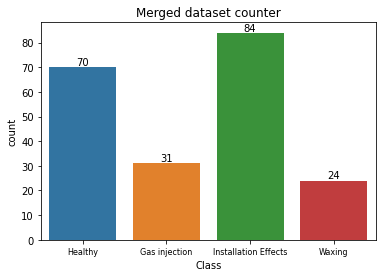

In [778]:
ax = sns.countplot(x=df_merge['Class'], label="Count") 
ax.bar_label(ax.containers[0]) 
ax.set_xticklabels(['Healthy', 'Gas injection', 'Installation Effects','Waxing'], fontsize=8) 
plt.title('Merged dataset counter')
plt.show()

## __3) Reduce Dimension with Principal Componenent Analysis (PCA)__
Principal component analysis (PCA) is a classical method for reducing the number of 
attributes in the data by projecting the data from its original high-dimensional space 
into a lower-dimensional space. The new attributes (also known as components) created by 
PCA have the following properties: 

(1) they are linear combinations of the original attributes, 

(2) they are orthogonal (perpendicular) to each other 

(3) they capture the maximum amount of variation in the data.  

Normalize data

In [779]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# save dataset merge
dataset = df_merge
dataset.to_csv('dataset/df_merge', sep='\t')

# split between X and Y
X= dataset.drop(['Class'],axis=1)
Y= dataset['Class']

# normalize data
scaler = StandardScaler()
X=scaler.fit_transform(X)


### Store projected values of the into a dataframe called projected 1

In [780]:
pca = PCA(.95)
X_pca = pca.fit_transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (209, 43)
transformed shape: (209, 5)


In [781]:
df_pca = pd.DataFrame(abs(pca.components_),columns=col_name_noclass)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4','PC5'])

projected = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4','PC5']) 
projected.head()

,PC1,PC2,PC3,PC4,PC5
0,-3.69867,-0.27284,2.43183,0.96861,-0.46070
1,-3.67439,-0.48569,1.34185,0.94708,-0.24432
2,-3.66895,-0.46736,1.32420,1.00787,-0.23231
3,-3.66481,-0.42954,1.33915,1.05455,-0.22127
4,-3.65249,-0.39701,1.33243,1.10652,-0.20395


In [782]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,...,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R
PC1,0.01032,0.00389,0.00863,0.01759,0.00564,0.00945,0.01976,0.03112,0.06541,0.06210,...,0.16240,0.16240,0.17997,0.17998,0.17996,0.17998,0.18013,0.18014,0.18056,0.17993
PC2,0.42443,0.43235,0.42878,0.02750,0.03699,0.04293,0.33191,0.12144,0.13910,0.15940,...,0.17059,0.17057,0.04399,0.04433,0.04512,0.04584,0.04225,0.04304,0.01148,0.01174
PC3,0.02397,0.05016,0.04443,0.51583,0.51749,0.51371,0.33394,0.16555,0.04387,0.12895,...,0.05178,0.05181,0.01162,0.00731,0.01164,0.00375,0.00866,0.00072,0.00045,0.00158
PC4,0.17680,0.10502,0.13477,0.06885,0.08239,0.10100,0.03178,0.35625,0.59442,0.56591,...,0.08110,0.08115,0.02672,0.02751,0.02462,0.02525,0.01663,0.01819,0.04330,0.05963
PC5,0.17611,0.12931,0.14758,0.11817,0.10546,0.12147,0.01203,0.47054,0.32035,0.02315,...,0.13656,0.13658,0.00414,0.00169,0.01662,0.01241,0.02092,0.01779,0.03992,0.04430


Plot Cummulative variances with individual variance
- 5 PC provides 95% of data


Explained variance ratio: [30.55587982  5.04849043  3.63611739  1.54492808  0.94599046]
Total cummulative sum: 41.731406187411615


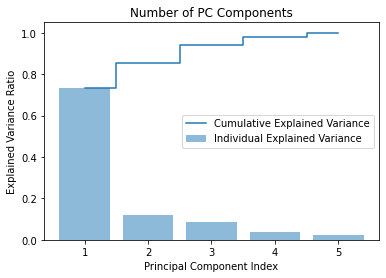

In [783]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(f"Explained variance ratio: {pca.explained_variance_}")
print(f"Total cummulative sum: {tot}")
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.bar(range(1,6), var_exp, alpha=0.5,
        align='center', label='Individual Explained Variance')
plt.step(range(1,6), cum_var_exp, where='mid',
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title('Number of PC Components')
plt.legend(loc='best')
plt.show()

Plot explained variance ratio

Text(0, 0.5, 'Cumulative Varience')

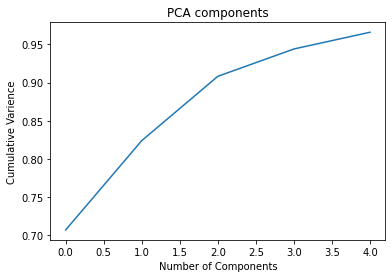

In [784]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Varience')

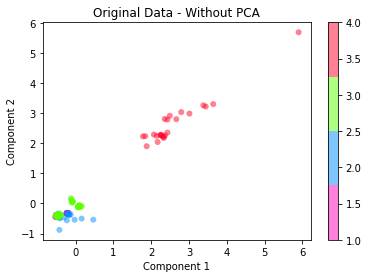

In [785]:
plt.scatter(X[:, 0], X[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 4))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Original Data - Without PCA')
plt.colorbar()

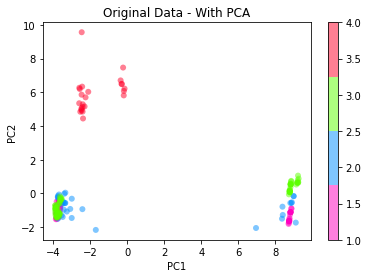

In [786]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 4))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Original Data - With PCA')
plt.colorbar()

/var/folders/7x/1p6my40n6kb5znc18rklfy9h0000gn/T/ipykernel_82256/2587984763.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure(figsize=(12,9)).gca(projection='3d')


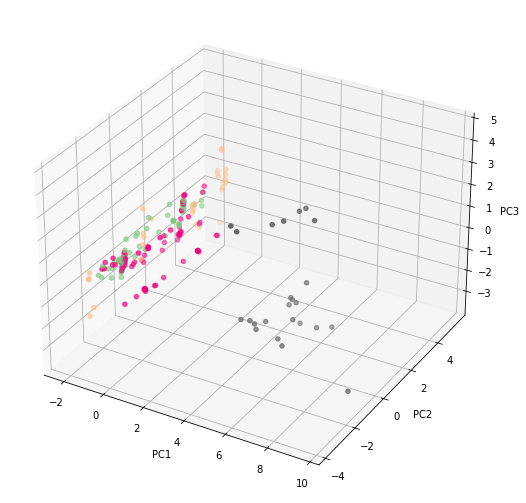

In [787]:
fig = plt.figure(figsize=(12,9)).gca(projection='3d')
fig.scatter(X_pca[:, 1], X_pca[:, 2],X_pca[:, 3],cmap=plt.cm.get_cmap('Accent', 4),c=Y)
fig.set_xlabel('PC1')
fig.set_ylabel('PC2')
fig.set_zlabel('PC3')
_ = plt.show()

# __4) Feature Importance - PCA__

In [788]:
df_pca = pd.DataFrame(abs(pca.components_), columns=col_name_noclass)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4','PC5'])
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Profile factor,Symmetry,Crossflow,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,...,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R
PC1,0.01032,0.00389,0.00863,0.01759,0.00564,0.00945,0.01976,0.03112,0.06541,0.06210,...,0.16240,0.16240,0.17997,0.17998,0.17996,0.17998,0.18013,0.18014,0.18056,0.17993
PC2,0.42443,0.43235,0.42878,0.02750,0.03699,0.04293,0.33191,0.12144,0.13910,0.15940,...,0.17059,0.17057,0.04399,0.04433,0.04512,0.04584,0.04225,0.04304,0.01148,0.01174
PC3,0.02397,0.05016,0.04443,0.51583,0.51749,0.51371,0.33394,0.16555,0.04387,0.12895,...,0.05178,0.05181,0.01162,0.00731,0.01164,0.00375,0.00866,0.00072,0.00045,0.00158
PC4,0.17680,0.10502,0.13477,0.06885,0.08239,0.10100,0.03178,0.35625,0.59442,0.56591,...,0.08110,0.08115,0.02672,0.02751,0.02462,0.02525,0.01663,0.01819,0.04330,0.05963
PC5,0.17611,0.12931,0.14758,0.11817,0.10546,0.12147,0.01203,0.47054,0.32035,0.02315,...,0.13656,0.13658,0.00414,0.00169,0.01662,0.01241,0.02092,0.01779,0.03992,0.04430


## Individual PC Results

PC1

In [789]:
df_pc1 =df_pca.iloc[[0]]
a = abs(pca.components_[0])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc1 = pd.DataFrame(values,columns=columns)
df_pc1

,Transit Time P4T,Signal Quality P3T,Signal Quality P3R,Transit Time P3R,Transit Time P3T,Signal Quality P1T,Transit Time P1R,Transit Time P2R,Transit Time P1T,Transit Time P2T,...,Speed of Sound P3,Speed of Sound P4,Speed of Sound P1,Flow Velocity P4,Flow Velocity P1,Profile factor,Flow Velocity P3,Crossflow,Flow Velocity P2,Symmetry
0,0.18056,0.18050,0.18031,0.18014,0.18013,0.18005,0.17998,0.17998,0.17997,0.17996,...,0.06210,0.05395,0.03112,0.01976,0.01759,0.01032,0.00945,0.00863,0.00564,0.00389


PC2

In [790]:
df_pc2 =df_pca.iloc[[1]]
a = abs(pca.components_[1])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc2 = pd.DataFrame(values,columns=columns)
df_pc2

,Symmetry,Crossflow,Profile factor,Speed of Sound P4,Flow Velocity P4,Gain P4T,Gain P4R,Speed of Sound P3,Speed of Sound P2,Signal Quality P4T,...,Gain P3R,Gain P3T,Gain P2R,Gain P2T,Transit Time P4R,Transit Time P4T,Gain P1T,Gain P1R,Signal Quality P3R,Signal Quality P3T
0,0.43235,0.42878,0.42443,0.37682,0.33191,0.17059,0.17057,0.15940,0.13910,0.12347,...,0.02285,0.02283,0.01240,0.01238,0.01174,0.01148,0.01039,0.01039,0.00545,0.00138


PC3

In [791]:
df_pc3 =df_pca.iloc[[2]]
a = abs(pca.components_[2])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc3 = pd.DataFrame(values,columns=columns)
df_pc3

,Flow Velocity P2,Flow Velocity P1,Flow Velocity P3,Flow Velocity P4,Speed of Sound P1,Speed of Sound P3,Signal Strength P4T,Signal Strength P4R,Speed of Sound P4,Gain P4R,...,Transit Time P1R,Signal Strength P2T,Signal Quality P1T,Transit Time P2R,Signal Strength P2R,Signal Quality P1R,Transit Time P4R,Signal Quality P2T,Transit Time P3R,Transit Time P4T
0,0.51749,0.51583,0.51371,0.33394,0.16555,0.12895,0.11486,0.08965,0.07362,0.05181,...,0.00731,0.00566,0.00518,0.00375,0.00338,0.00254,0.00158,0.00111,0.00072,0.00045


PC4

In [792]:
df_pc4 =df_pca.iloc[[3]]
a = abs(pca.components_[3])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc4 = pd.DataFrame(values,columns=columns)
df_pc4

,Speed of Sound P2,Speed of Sound P3,Speed of Sound P1,Profile factor,Crossflow,Gain P3R,Gain P3T,Speed of Sound P4,Symmetry,Flow Velocity P3,...,Transit Time P2R,Signal Strength P3T,Transit Time P2T,Signal Quality P3T,Transit Time P3R,Transit Time P3T,Signal Quality P1T,Signal Quality P3R,Signal Strength P4R,Signal Strength P4T
0,0.59442,0.56591,0.35625,0.17680,0.13477,0.12585,0.12580,0.10565,0.10502,0.10100,...,0.02525,0.02494,0.02462,0.01832,0.01819,0.01663,0.01570,0.01506,0.00871,0.00017


PC5

In [793]:
df_pc5 =df_pca.iloc[[4]]
a = abs(pca.components_[4])
b = zip(col_name_noclass,a)
# Using sorted and lambda
res = sorted(b, key = lambda x: x[1],reverse=True)

values = []
columns =[]
for col,val in res:
    values.append(val)
    columns.append(col)
values =[values]

df_pc5 = pd.DataFrame(values,columns=columns)
df_pc5

,Speed of Sound P1,Signal Strength P4T,Signal Strength P4R,Speed of Sound P2,Speed of Sound P4,Profile factor,Signal Strength P1R,Signal Strength P1T,Crossflow,Gain P4R,...,Transit Time P2R,Signal Quality P3T,Flow Velocity P4,Signal Quality P2T,Gain P3R,Gain P3T,Transit Time P1T,Signal Quality P1R,Signal Quality P1T,Transit Time P1R
0,0.47054,0.44885,0.38537,0.32035,0.25587,0.17611,0.17366,0.17358,0.14758,0.13658,...,0.01241,0.01236,0.01203,0.01080,0.00793,0.00789,0.00414,0.00295,0.00204,0.00169


### Biplots

PC1 and PC2

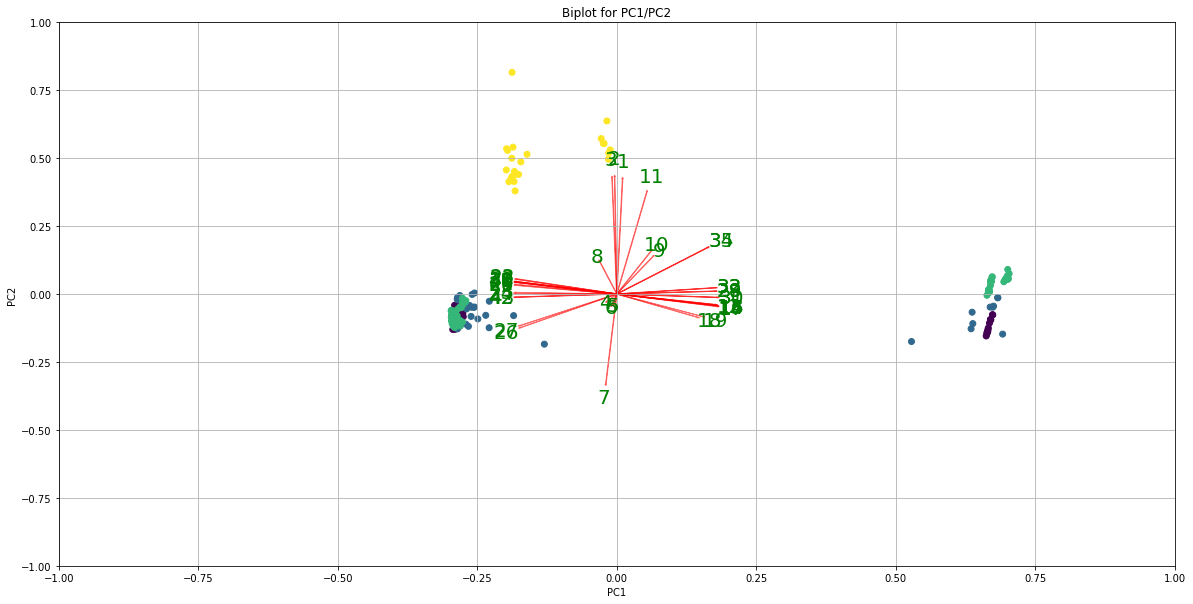

In [794]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    y= dataset['Class']
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, str(i+1),fontsize=20, color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[0:2, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC1/PC2')
plt.xlabel("PC1".format(1))
plt.ylabel("PC2".format(2))
plt.show()

PC3 and PC4

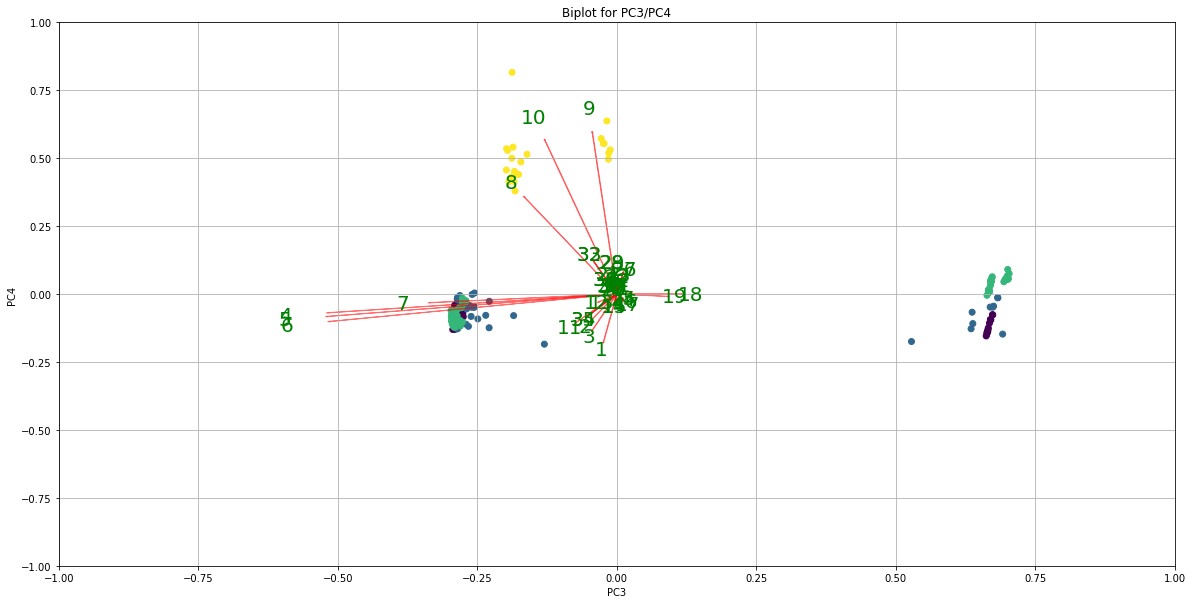

In [795]:
#Call the function. Use only the 2 PCs.
myplot(X_pca[:,0:2],np.transpose(pca.components_[2:4, :]))
# figure size
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.title('Biplot for PC3/PC4')
plt.xlabel("PC3".format(1))
plt.ylabel("PC4".format(2))
plt.show()

# Data Mining - With PCA

## __1) Split Dataset 70/30__

In [796]:
from sklearn.model_selection import train_test_split

# use this as main model
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## __2) Supervised Learning -LR,SVM,NLSVM,DT,NN,LD__

### Linear Support Vector Machine 

Model score clf4: 0.6507936507936508
Highest training accuracy: 0.6507936507936508
Highest testing accuracy: 0.6507936507936508
Lowest testing accuracy: 0.4603174603174603


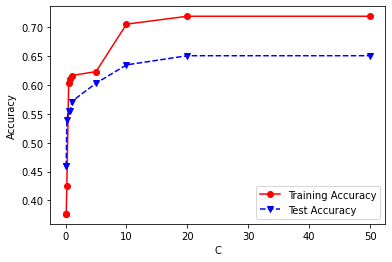

In [797]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf4 = SVC(C=param,kernel='linear')
    clf4.fit(X_train, y_train)
    Y_predTrain = clf4.predict(X_train)
    Y_predTest = clf4.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')

print (f"Model score clf4: {clf4.score(X_test, y_test)}")
print("Highest training accuracy:", max(SVMtestAcc))
print("Highest testing accuracy:", max(SVMtestAcc))
print("Lowest testing accuracy:", min(SVMtestAcc))



### Non Linear Support Vector Machine(SVM)

Model score: 0.6507936507936508
Highest training accuracy: 0.6666666666666666
Highest testing accuracy: 0.6666666666666666
Lowest testing accuracy: 0.4603174603174603


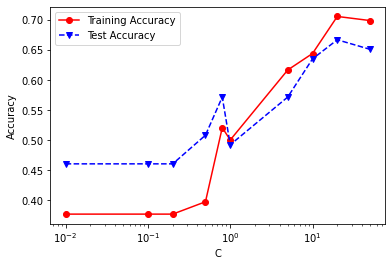

In [798]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto',random_state=0)
    clf5.fit(X_train, y_train)
    Y_predTrain = clf5.predict(X_train)
    Y_predTest = clf5.predict(X_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')

print (f"Model score: {clf5.score(X_test, y_test)}")
print("Highest training accuracy:", max(SVMtestAcc))
print("Highest testing accuracy:", max(SVMtestAcc))
print("Lowest testing accuracy:", min(SVMtestAcc))

### Decision Tree

Model score: 0.7301587301587301
Highest training accuracy: 1.0
Highest testing accuracy: 0.7301587301587301
Lowest testing accuracy: 0.4603174603174603


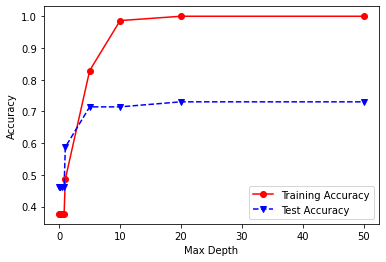

In [799]:
from sklearn.tree import DecisionTreeClassifier

clf7 = DecisionTreeClassifier(max_depth=10)
maxdepth = [1,2,3,4,6,8,10,15,18,20,30,40]
dt_trainAcc = []
dt_testAcc = []

for param in C:
    clf7=DecisionTreeClassifier(max_depth=param, random_state=0)
    clf7.fit(X_train, y_train)
    Y_predTrain = clf7.predict(X_train)
    Y_predTest = clf7.predict(X_test)
    dt_trainAcc.append(accuracy_score(y_train, Y_predTrain))
    dt_testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, dt_trainAcc, 'ro-', C, dt_testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

print (f"Model score: {clf7.score(X_test, y_test)}")
print("Highest training accuracy:", max(dt_trainAcc))
print("Highest testing accuracy:", max(dt_testAcc))
print("Lowest testing accuracy:", min(dt_testAcc))

In [800]:
Y = dataset['Class']
X = dataset.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=59)
clf = clf.fit(X, Y)

[Text(0.5, 0.875, 'Flow Velocity P4 <= 1.541\nentropy = 1.824\nsamples = 209\nvalue = [70, 31, 84, 24]\nclass = 3'),
 Text(0.25, 0.625, 'Flow Velocity P2 <= 1.996\nentropy = 0.935\nsamples = 37\nvalue = [0, 13, 0, 24]\nclass = 4'),
 Text(0.125, 0.375, 'entropy = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0]\nclass = 2'),
 Text(0.375, 0.375, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24]\nclass = 4'),
 Text(0.75, 0.625, 'Gain P4T <= 66.061\nentropy = 1.374\nsamples = 172\nvalue = [70, 18, 84, 0]\nclass = 3'),
 Text(0.625, 0.375, 'Gain P3T <= 1.6\nentropy = 1.411\nsamples = 143\nvalue = [70, 18, 55, 0]\nclass = 1'),
 Text(0.5, 0.125, 'entropy = 0.999\nsamples = 106\nvalue = [51, 0, 55, 0]\nclass = 3'),
 Text(0.75, 0.125, 'entropy = 0.999\nsamples = 37\nvalue = [19, 18, 0, 0]\nclass = 1'),
 Text(0.875, 0.375, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29, 0]\nclass = 3')]

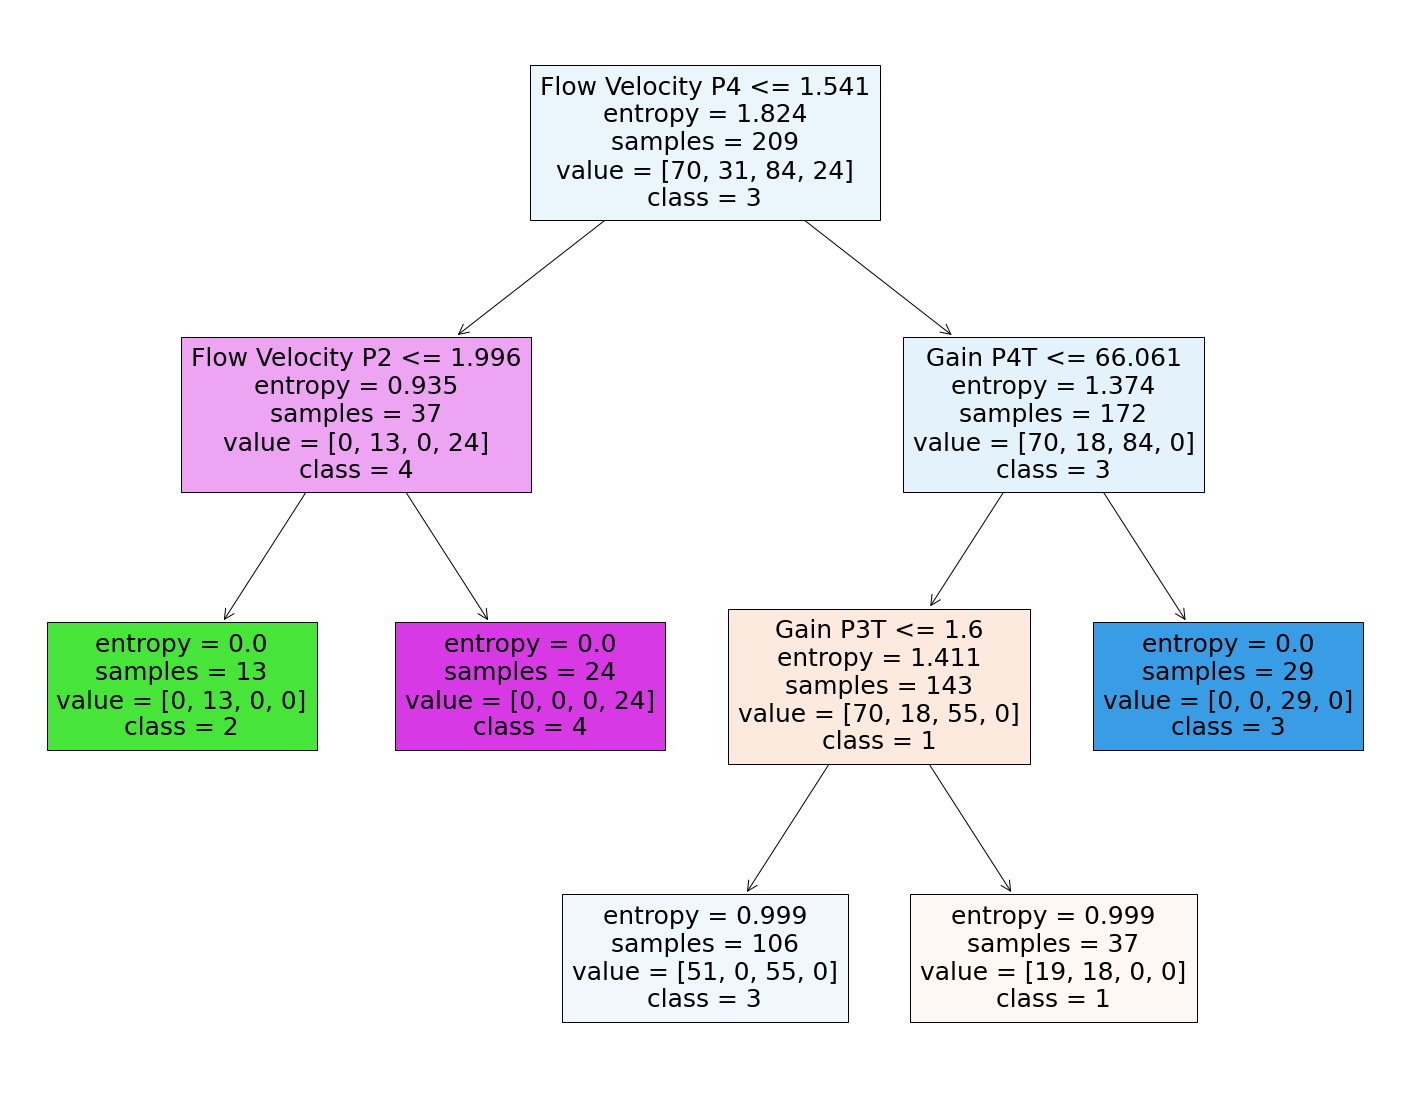

In [801]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=['1','2','3','4'],filled=True, impurity=True)

### Neural Network

Model score: 0.9047619047619048
Highest training accuracy: 0.958904109589041
Highest testing accuracy: 0.9206349206349206
Lowest testing accuracy: 0.6666666666666666


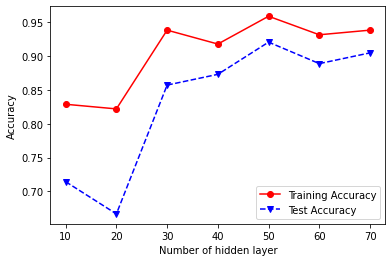

In [802]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=5000)
    clf6.fit(X_train, y_train)
 
    Y_predTrain = clf6.predict(X_train)
    Y_predTest = clf6.predict(X_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
    
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')

print (f"Model score: {clf6.score(X_test, y_test)}")
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))

### Naive Bayes

In [803]:
from sklearn.naive_bayes import GaussianNB

clf2=GaussianNB()
clf2.fit(X_train, y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)
trainAcc=accuracy_score(y_train, Y_predTrain)
testAcc=accuracy_score(y_test, Y_predTest)

print (f"Model score: {clf2.score(X_test, y_test)}")
print("Training Accuracy:",trainAcc)
print("Testing Accuracy:",testAcc)

Model score: 0.6825396825396826
Training Accuracy: 0.7191780821917808
Testing Accuracy: 0.6825396825396826


### __Linear Discriminant__

In [804]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print (f"Model score: {lda.score(X_test, y_test)}")
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Model score: 0.6825396825396826
Accuracy of LDA classifier on training set: 0.73
Accuracy of LDA classifier on test set: 0.68


## __3) Anomaly Detection using Random Forest__

In [805]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [806]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
# test set 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


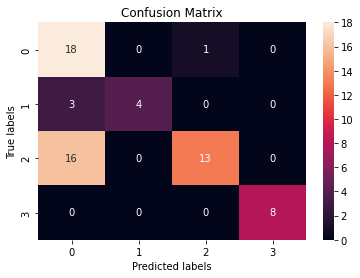

Accuracy : 0.6825396825396826


In [807]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

array_cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sn.heatmap(array_cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))

## __4) Anomaly Detection using Linear Regression(MSE, MAE, RMSE)__

In [808]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.DataFrame(X_pca)
df.head()

,0,1,2,3,4
0,-3.69867,-0.27284,2.43183,0.96861,-0.46070
1,-3.67439,-0.48569,1.34185,0.94708,-0.24432
2,-3.66895,-0.46736,1.32420,1.00787,-0.23231
3,-3.66481,-0.42954,1.33915,1.05455,-0.22127
4,-3.65249,-0.39701,1.33243,1.10652,-0.20395


In [809]:
XTemp = df[0].values.reshape(-1, 1)
yTemp = df[1].values.reshape(-1, 1)

In [810]:
X_trainTemp, X_testTemp, y_trainTemp, y_testTemp = train_test_split(
        XTemp, yTemp, test_size=0.3, random_state=0)

In [811]:
regressorTemp = LinearRegression()
regressorTemp.fit(X_trainTemp, y_trainTemp)
y_predTemp = regressorTemp.predict(X_testTemp)

In [812]:
print('Mean Absolute Error:',
          metrics.mean_absolute_error(y_testTemp, y_predTemp))
print('Mean Squared Error:',
        metrics.mean_squared_error(y_testTemp, y_predTemp))
print('Root Mean Squared Error:',
        np.sqrt(metrics.mean_squared_error(y_testTemp, y_predTemp)))
# get intercept:
print("y intercept: " + str(regressorTemp.intercept_))
# get slope:
print("slope: " + str(regressorTemp.coef_))

Mean Absolute Error: 1.4561046687804589
Mean Squared Error: 5.115391551858663
Root Mean Squared Error: 2.261723137755517
y intercept: [-0.04030685]
slope: [[-0.0030249]]


Text(0, 0.5, 'PC2')

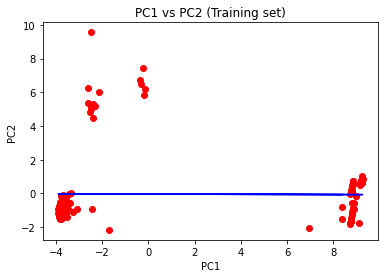

In [813]:
# show training set
plt.scatter(X_trainTemp, y_trainTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

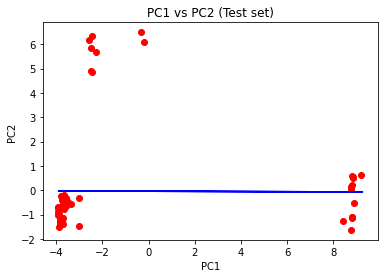

In [814]:
  # show test set
plt.scatter(X_testTemp, y_testTemp, color='red')
plt.plot(X_trainTemp, regressorTemp.predict(X_trainTemp), color='blue')
plt.title('PC1 vs PC2 (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')